In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split


import cv2
from PIL import Image 

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

## Import Libraries

## Data Collection

In [9]:
train_path = "C:\\Users\\may20\\Downloads\\dataset\\Training"
test_path = "C:\\Users\\may20\\Downloads\\dataset\\Testing"

gl_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training\\glioma_tumor"
men_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training\\meningioma_tumor"
no_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training\\no_tumor"
pit_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training\\pituitary_tumor"


gl_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing\\glioma_tumor"
men_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing\\meningioma_tumor"
no_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing\\no_tumor"
pit_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing\\pituitary_tumor"

gl_tr = os.listdir(gl_tr)
men_tr = os.listdir(men_tr)
no_tr = os.listdir(no_tr)
pit_tr = os.listdir(pit_tr)

gl_ts = os.listdir(gl_ts)
men_ts = os.listdir(men_ts)
no_ts = os.listdir(no_ts)
pit_ts = os.listdir(pit_ts)

In [10]:
print(len(gl_tr))
print(len(men_tr))
print(len(no_tr))
print(len(pit_tr))

826
822
395
827


In [11]:
print(len(gl_ts))
print(len(men_ts))
print(len(no_ts))
print(len(pit_ts))

100
115
105
74


## Class Labels

In [12]:
gl_tr_label = [0]*len(gl_tr)
men_tr_label = [1]*len(men_tr)
no_tr_label = [2]*len(no_tr)
pit_tr_label = [3]*len(pit_tr)

gl_ts_label = [0]*len(gl_ts)
men_ts_label = [1]*len(men_ts)
no_ts_label = [2]*len(no_ts)
pit_ts_label = [3]*len(pit_ts)

In [13]:
train_label = gl_tr_label + men_tr_label + no_tr_label + pit_tr_label
test_label = gl_ts_label + men_ts_label + no_ts_label + pit_ts_label

In [14]:
print(len(train_label))
print(len(test_label))

2870
394


In [15]:
train_label[:4]

[0, 0, 0, 0]

In [16]:
test_label[-5:]

[3, 3, 3, 3, 3]

In [17]:
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [18]:
label = train_label + test_label
len(label)

3264

In [19]:
y = np.array(label)

In [20]:
y

array([0, 0, 0, ..., 3, 3, 3])

## Images Data

In [21]:
# gl_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training/glioma_tumor"
# men_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training/meningioma_tumor"
# no_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training/no_tumor"
# pit_tr = "C:\\Users\\may20\\Downloads\\dataset\\Training/pituitary_tumor"


# gl_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing/glioma_tumor"
# men_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing/meningioma_tumor"
# no_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing/no_tumor"
# pit_ts = "C:\\Users\\may20\\Downloads\\dataset\\Testing/pituitary_tumor"

data = []

## For Training Data
for img_file in gl_tr:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Training/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_tr:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Training/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_tr:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Training/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_tr:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Training/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
    
## For Testing Data
    
for img_file in gl_ts:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Testing/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_ts:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Testing/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_ts:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Testing/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_ts:
    image = Image.open("C:\\Users\\may20\\Downloads\\dataset\\Testing/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)

In [22]:
x = np.array(data)

In [23]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
print(x.shape)
print(y.shape)

(3264, 224, 224, 3)
(3264,)


## Split The Data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2937, 224, 224, 3)
(327, 224, 224, 3)
(2937,)
(327,)


## Train Data Image Visualization

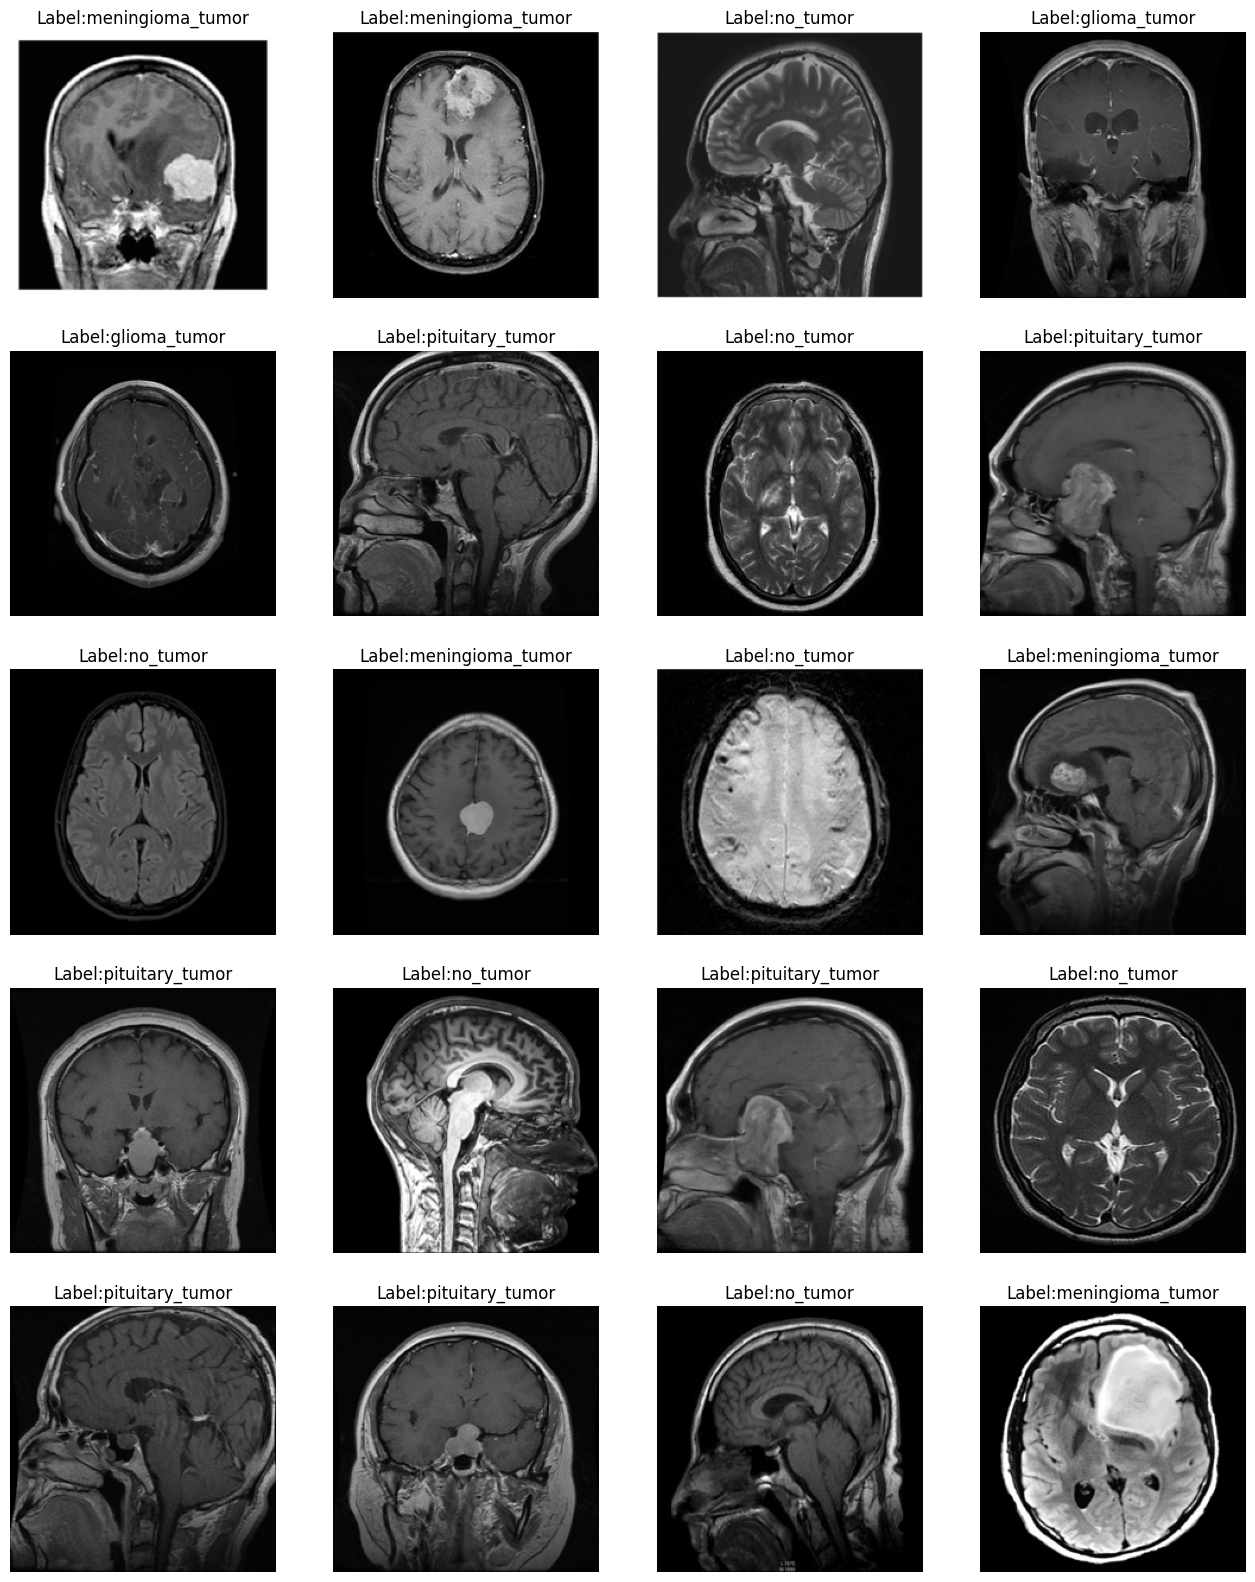

In [26]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{class_labels[y_train[i]]}")
    plt.axis("off")

## Scale The Data

In [27]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# Using MobileNet V2 Pre-trained Model

In [28]:
# MobileNet V2 Classification 100%  224x224
path1 ="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"

path="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
pretrained_model = hub.KerasLayer(path1, input_shape=(224,224,3), trainable=False)

In [29]:
num_class = 4
pre_model = Sequential()
pre_model.add(pretrained_model)
pre_model.add(Dense(units=num_class,activation="softmax"))

pre_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 4)                 4008      
                                                                 
Total params: 3,544,273
Trainable params: 4,008
Non-trainable params: 3,540,265
_________________________________________________________________


In [30]:
pre_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_1 = pre_model.fit(x_train_scaled, y_train ,
          batch_size=32, epochs=15, validation_data = (x_test_scaled,y_test))

Epoch 1/15
92/92 [==============================] - 463s 4s/step - loss: 0.9227 - accuracy: 0.6541 - val_loss: 0.5670 - val_accuracy: 0.7798
Epoch 2/15
92/92 [==============================] - 325s 4s/step - loss: 0.5125 - accuracy: 0.8080 - val_loss: 0.4881 - val_accuracy: 0.8073
Epoch 3/15
92/92 [==============================] - 358s 4s/step - loss: 0.4297 - accuracy: 0.8407 - val_loss: 0.5182 - val_accuracy: 0.7951
Epoch 4/15
92/92 [==============================] - 376s 4s/step - loss: 0.3803 - accuracy: 0.8628 - val_loss: 0.4160 - val_accuracy: 0.8440
Epoch 5/15
92/92 [==============================] - 353s 4s/step - loss: 0.3577 - accuracy: 0.8669 - val_loss: 0.4059 - val_accuracy: 0.8532
Epoch 6/15
92/92 [==============================] - 377s 4s/step - loss: 0.3150 - accuracy: 0.8890 - val_loss: 0.4024 - val_accuracy: 0.8502
Epoch 7/15
92/92 [==============================] - 273s 3s/step - loss: 0.2951 - accuracy: 0.9009 - val_loss: 0.3893 - val_accuracy: 0.8593
Epoch 8/15
92

## Model Evaluation on Test & Train Data

In [31]:
loss, acc = pre_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = pre_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 174s 2s/step - loss: 0.1854 - accuracy: 0.9435
Loss on Train Data: 0.18536770343780518
Accuracy on Train Data: 0.9434797167778015

11/11 [==============================] - 21s 2s/step - loss: 0.3233 - accuracy: 0.8777
Loss on Test Data: 0.323271244764328
Accuracy on Test Data: 0.8776758313179016


In [32]:
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]

loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]

## Training and Validation Accuracy Plot

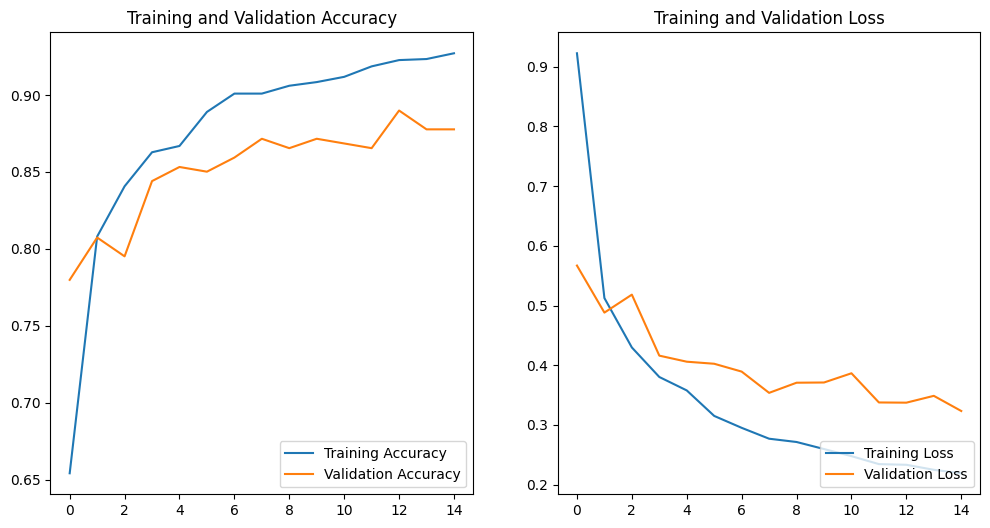

In [33]:
EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Prediction on Test Data

In [34]:
y_pred = pre_model.predict(x_test_scaled)

11/11 [==============================] - 18s 1s/step


In [35]:
y_pred_test_label = [np.argmax(i) for i in y_pred]

## Actual and Predicted Images of Dogs

In [36]:
y_pred_test_label[:10]  ## Predicted Images

[3, 0, 0, 2, 3, 0, 0, 0, 2, 3]

In [37]:
y_test[:10]  ## Actual Images

array([3, 0, 0, 2, 1, 0, 0, 0, 2, 3])

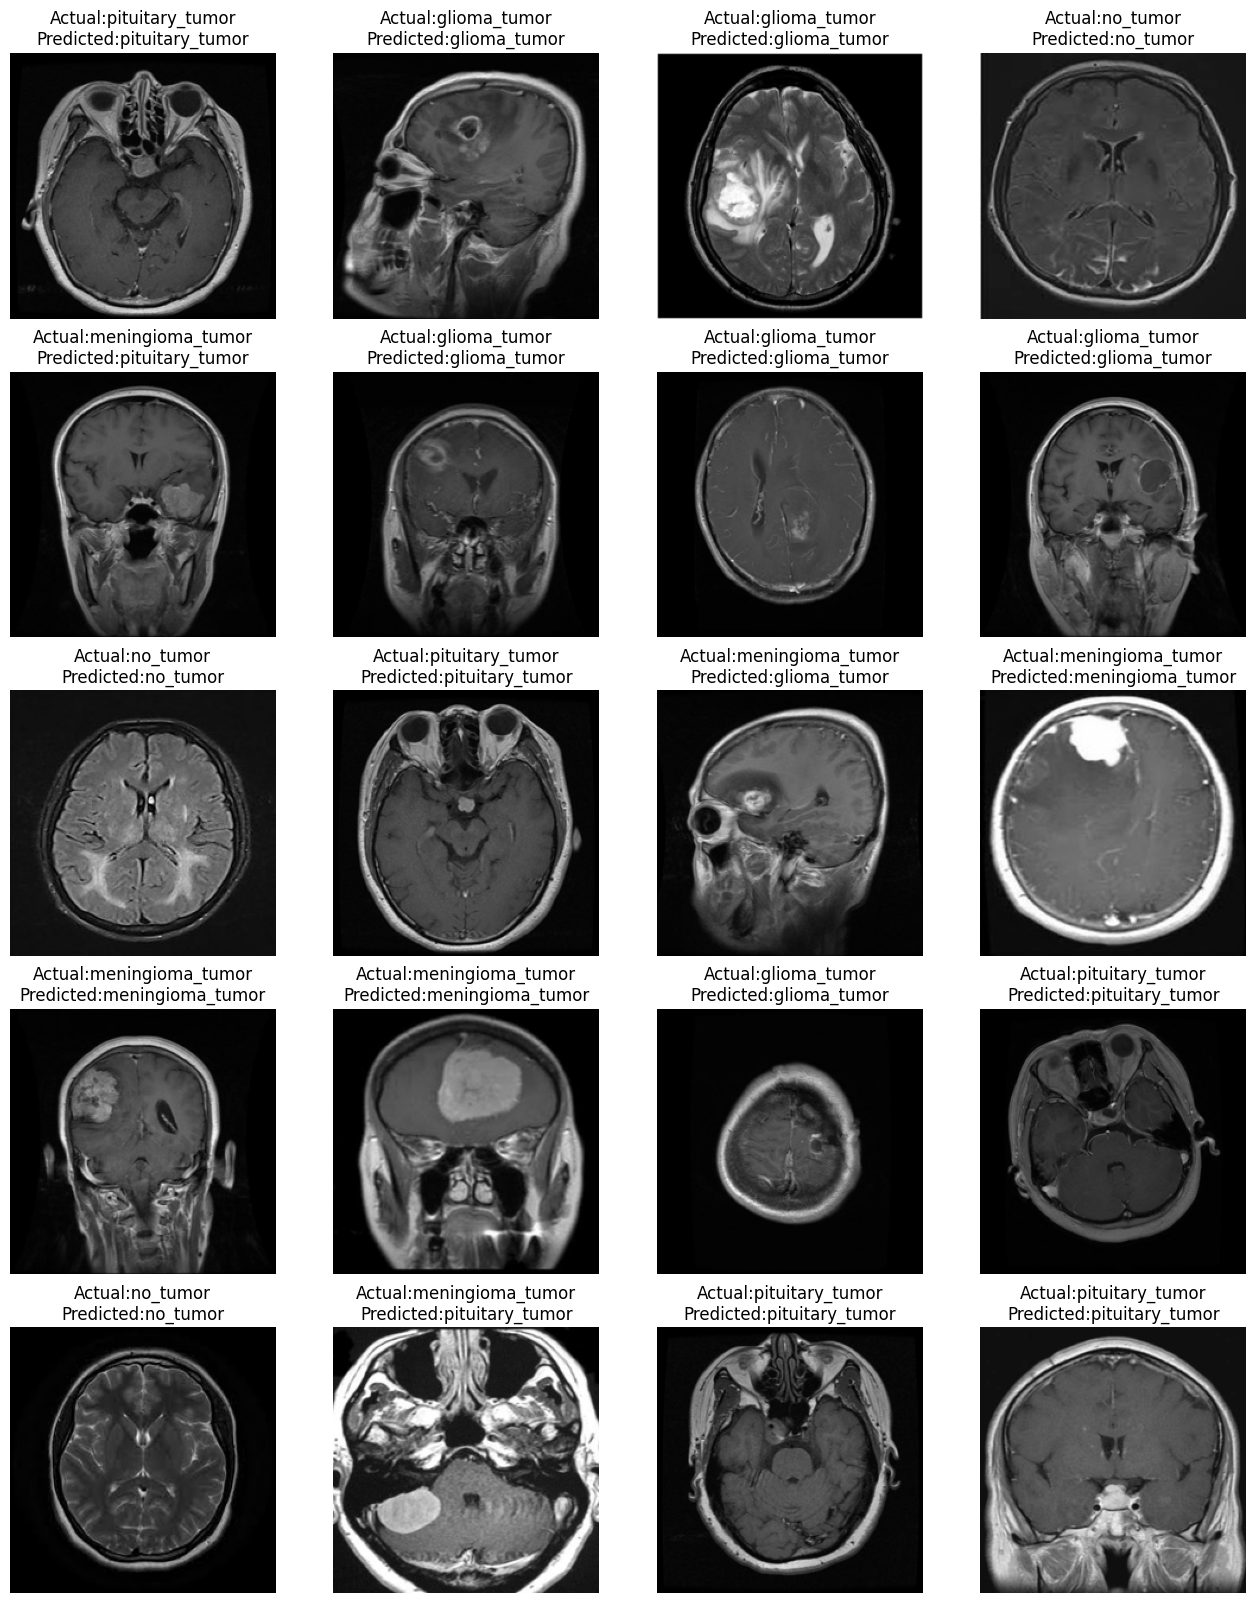

In [38]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

# ResNet V2 Pretrained Model

### ResNet V-2 152 Layers 

In [39]:
path = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"  # 224x224x3
resnet_pre_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

In [40]:
num_class = 4
resnet_model = Sequential()
resnet_model.add(resnet_pre_model)
resnet_model.add(Dense(units=num_class, activation="softmax"))

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              60382697  
                                                                 
 dense_1 (Dense)             (None, 4)                 4008      
                                                                 
Total params: 60,386,705
Trainable params: 4,008
Non-trainable params: 60,382,697
_________________________________________________________________


In [41]:
resnet_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_3 = resnet_model.fit(x_train_scaled, y_train ,
          batch_size=32, epochs=4, validation_data=(x_test_scaled, y_test))

Epoch 1/4
92/92 [==============================] - 1584s 17s/step - loss: 0.9355 - accuracy: 0.6442 - val_loss: 0.7154 - val_accuracy: 0.6911
Epoch 2/4
92/92 [==============================] - 1336s 15s/step - loss: 0.5828 - accuracy: 0.7804 - val_loss: 0.5815 - val_accuracy: 0.7768
Epoch 3/4
92/92 [==============================] - 1152s 13s/step - loss: 0.5169 - accuracy: 0.8066 - val_loss: 0.5643 - val_accuracy: 0.7523
Epoch 4/4
92/92 [==============================] - 1255s 14s/step - loss: 0.4669 - accuracy: 0.8349 - val_loss: 0.5205 - val_accuracy: 0.7951


## Model Evaluation on Test and Train Data

In [42]:
loss, acc = resnet_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = resnet_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 1086s 12s/step - loss: 0.4136 - accuracy: 0.8447
Loss on Train Data: 0.4135846495628357
Accuracy on Train Data: 0.844739556312561

11/11 [==============================] - 210s 19s/step - loss: 0.5205 - accuracy: 0.7951
Loss on Test Data: 0.5205118060112
Accuracy on Test Data: 0.7951070070266724


In [43]:
y_pred = resnet_model.predict(x_test_scaled)
y_pred_test_label = [np.argmax(i) for i in y_pred]

print("Actual Label:",y_test[:10])
print("Predicted label:",y_pred_test_label[:10])

11/11 [==============================] - 146s 13s/step
Actual Label: [3 0 0 2 1 0 0 0 2 3]
Predicted label: [3, 0, 1, 2, 1, 0, 0, 1, 2, 3]


## Compare Actual and Predicted Images

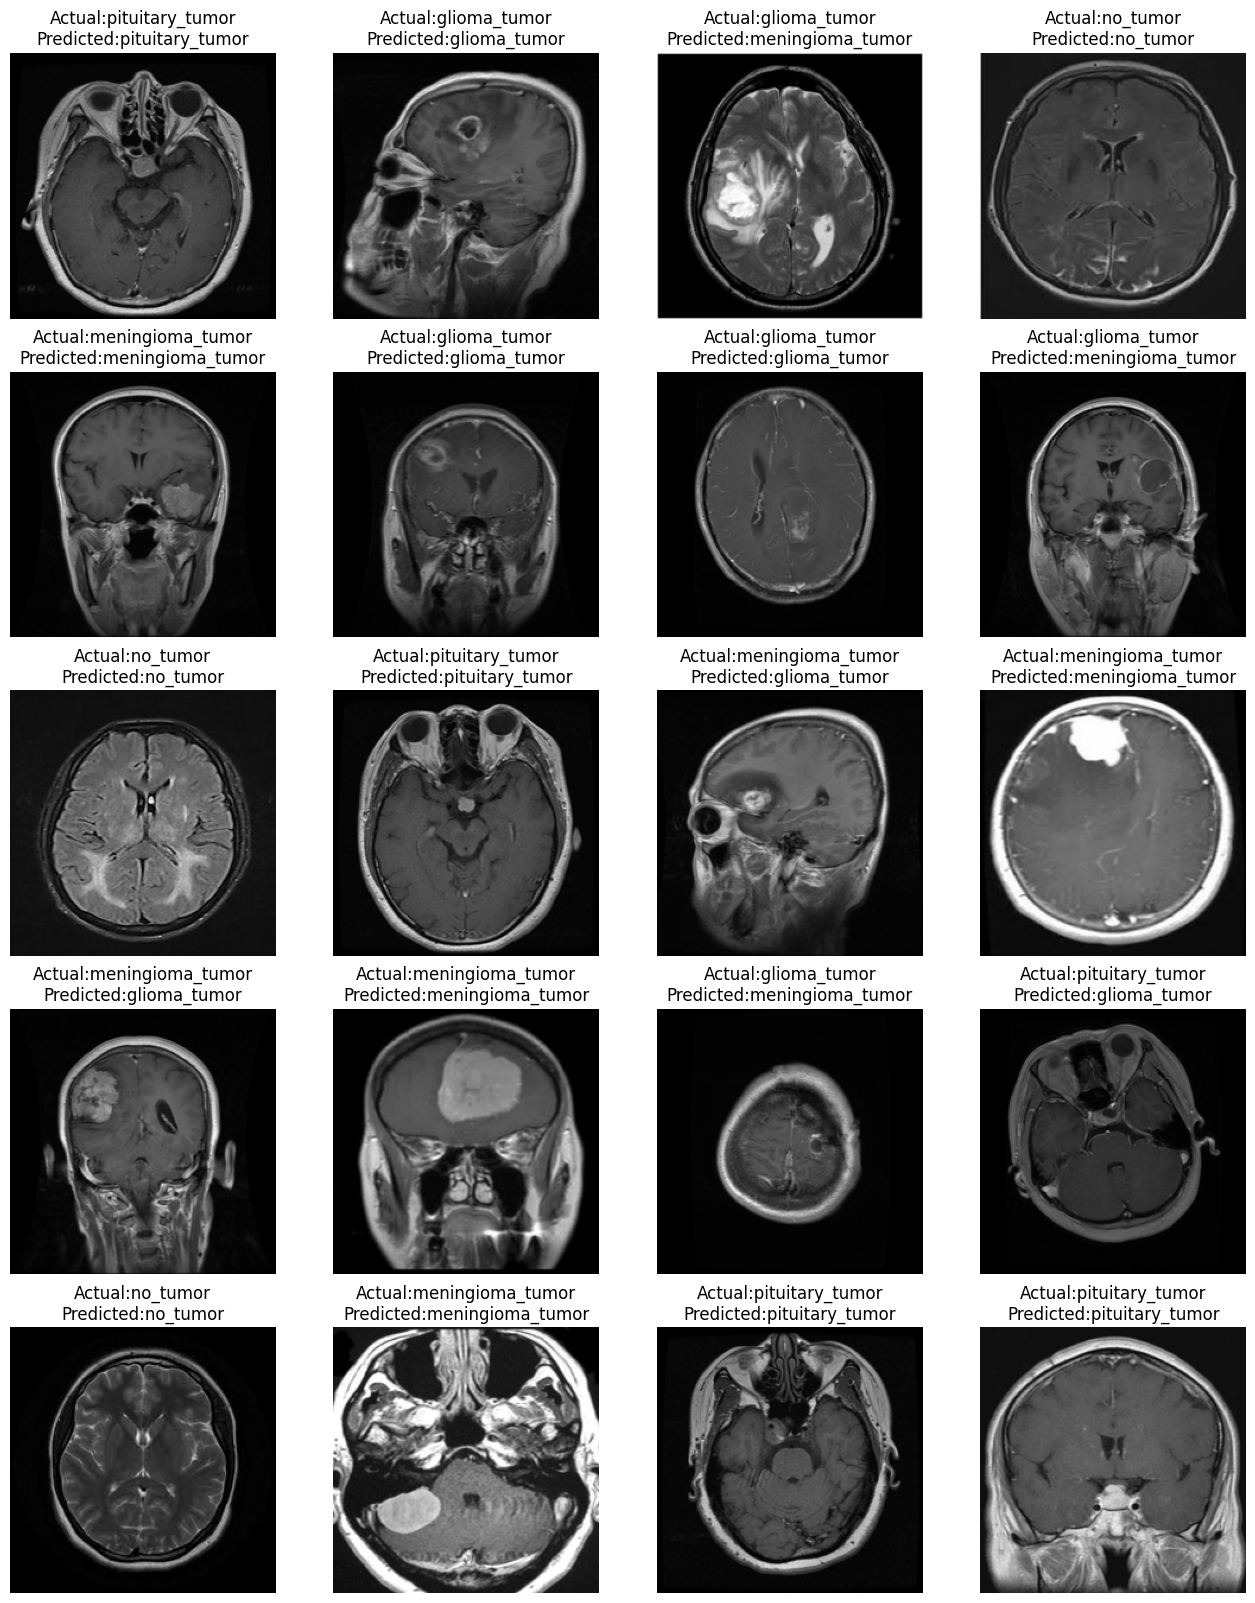

In [44]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

# EfficientNet Pre-trained Model

In [45]:
path = "https://tfhub.dev/google/efficientnet/b0/classification/1" # 224x224x3
efficient_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

num_class = 4
eff_model = Sequential()
eff_model.add(efficient_model)
eff_model.add(Dense(units=num_class, activation="softmax"))

eff_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              5330564   
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 5,334,568
Trainable params: 4,004
Non-trainable params: 5,330,564
_________________________________________________________________


In [46]:
eff_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_4 = eff_model.fit(x_train_scaled , y_train ,
          batch_size=32, epochs=5, validation_data=(x_test_scaled,y_test))

Epoch 1/5
92/92 [==============================] - 388s 4s/step - loss: 0.8930 - accuracy: 0.6473 - val_loss: 0.6484 - val_accuracy: 0.7339
Epoch 2/5
92/92 [==============================] - 316s 3s/step - loss: 0.5393 - accuracy: 0.7913 - val_loss: 0.5508 - val_accuracy: 0.7829
Epoch 3/5
92/92 [==============================] - 273s 3s/step - loss: 0.4532 - accuracy: 0.8253 - val_loss: 0.5092 - val_accuracy: 0.8012
Epoch 4/5
92/92 [==============================] - 276s 3s/step - loss: 0.4155 - accuracy: 0.8424 - val_loss: 0.4982 - val_accuracy: 0.7890
Epoch 5/5
92/92 [==============================] - 366s 4s/step - loss: 0.3891 - accuracy: 0.8546 - val_loss: 0.4605 - val_accuracy: 0.8135


In [47]:
loss, acc = eff_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = eff_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 333s 4s/step - loss: 0.3635 - accuracy: 0.8658
Loss on Train Data: 0.36345842480659485
Accuracy on Train Data: 0.865849494934082

11/11 [==============================] - 29s 3s/step - loss: 0.4605 - accuracy: 0.8135
Loss on Test Data: 0.46047675609588623
Accuracy on Test Data: 0.8134556412696838


In [48]:
y_pred = eff_model.predict(x_test_scaled)
y_pred_test_label = [np.argmax(i) for i in y_pred]

print("Actual Label:",y_test[:10])
print("Predicted label:",y_pred_test_label[:10])

11/11 [==============================] - 34s 3s/step
Actual Label: [3 0 0 2 1 0 0 0 2 3]
Predicted label: [3, 0, 1, 2, 1, 0, 0, 1, 2, 3]


## Compare Actual and predicted Labels

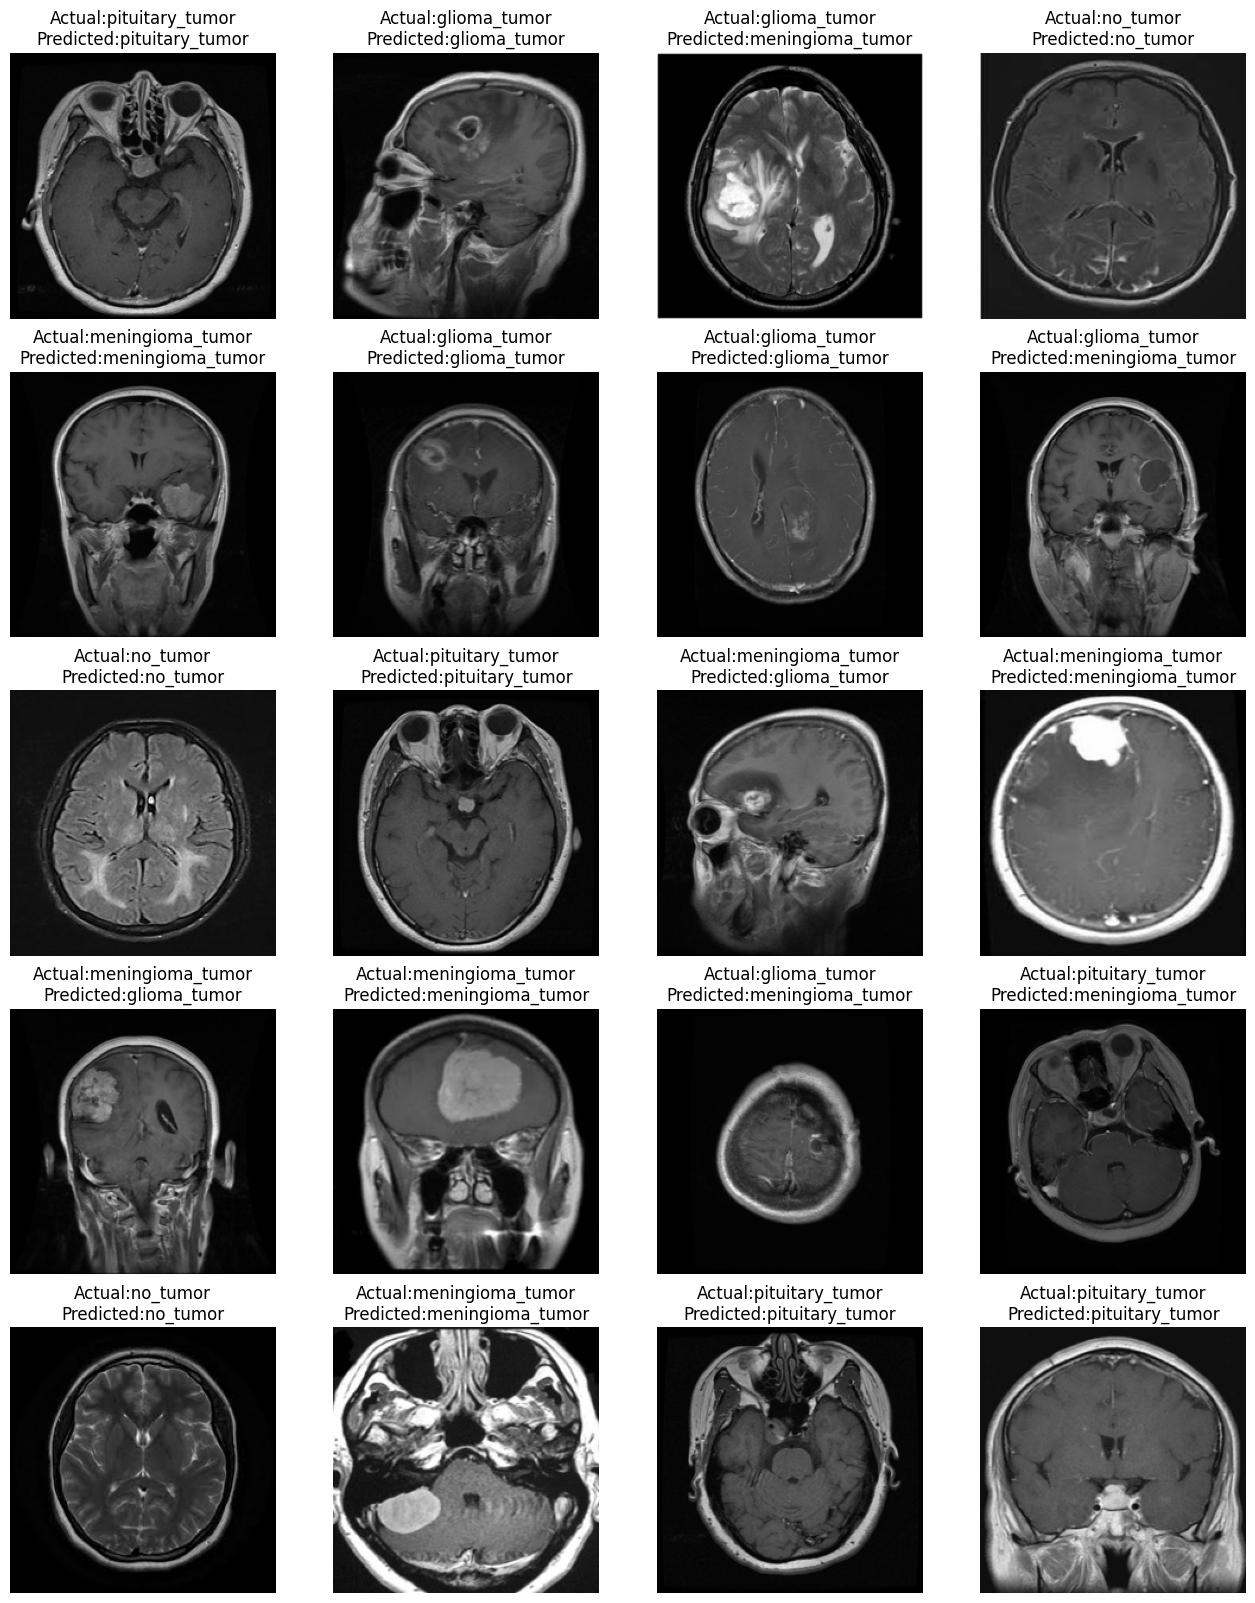

In [49]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")